# Data Wrangling

## Import tools

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Read the dataset into a pandas DataFrame

In [33]:
# path
file_path = 'Data\E Commerce Dataset.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

## Data Exploration and Inspection

In [34]:
# Display the first few rows of the DataFrame to check if the data was read correctly
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [35]:
# Summary statistics for numerical columns
print(df.describe())  

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

In [36]:
# Overview of the data types and missing values
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Drop Unnecessary Columns

In [37]:
df.drop(columns=['CustomerID', 'NumberOfDeviceRegistered'], inplace=True)

## Handle Missing Values

In [38]:
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)

In [39]:
df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean(), inplace=True)

In [40]:
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean(), inplace=True)

# Exploratory Data Analysis

## Summary Statistics

In [45]:
# Summary statistics for numerical columns
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5630.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,0.374240,8.354164,0.915389,8.339095,0.721926,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.553382,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,163.000000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


## Data Visualization: Explore Relationships

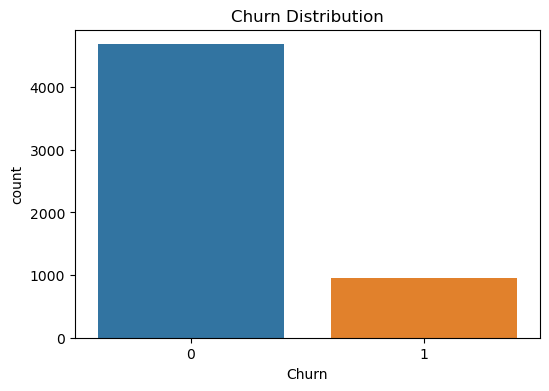

In [41]:
# Plot Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

C:\Users\nbho\AppData\Local\Temp\ipykernel_15816\1521501704.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


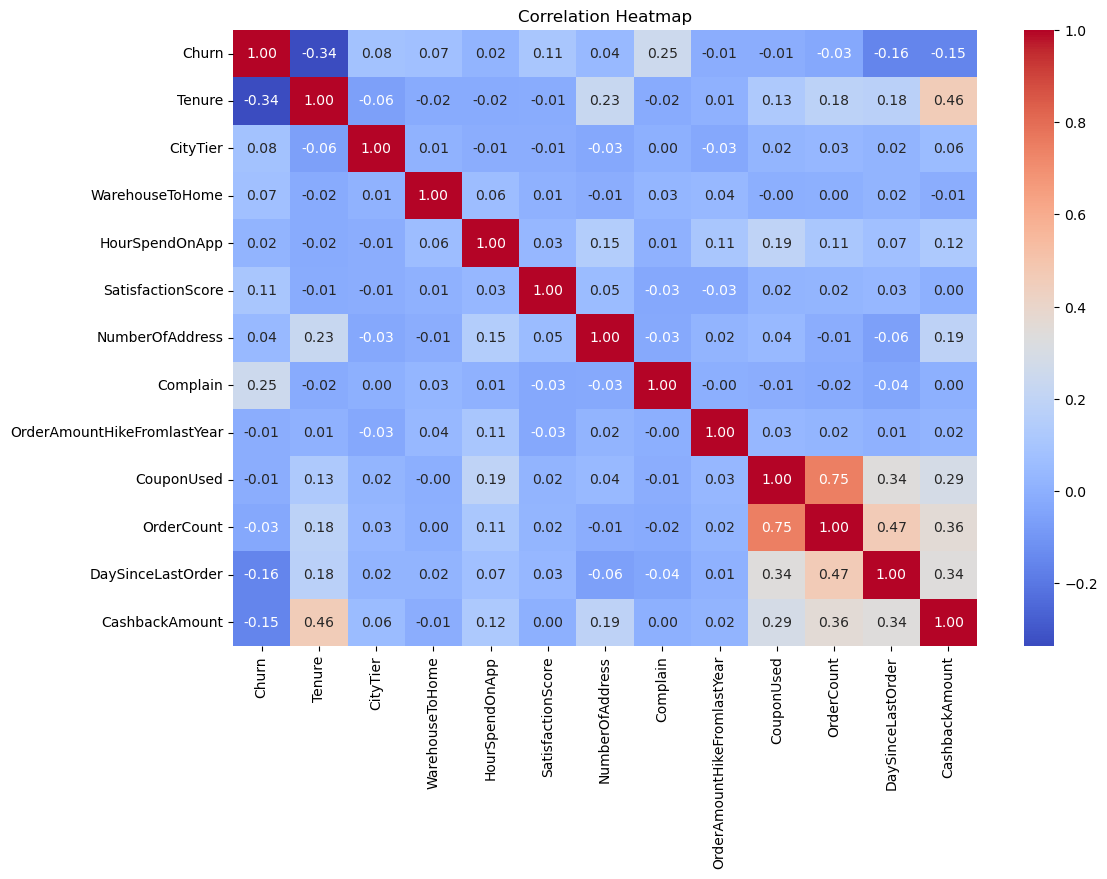

In [42]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

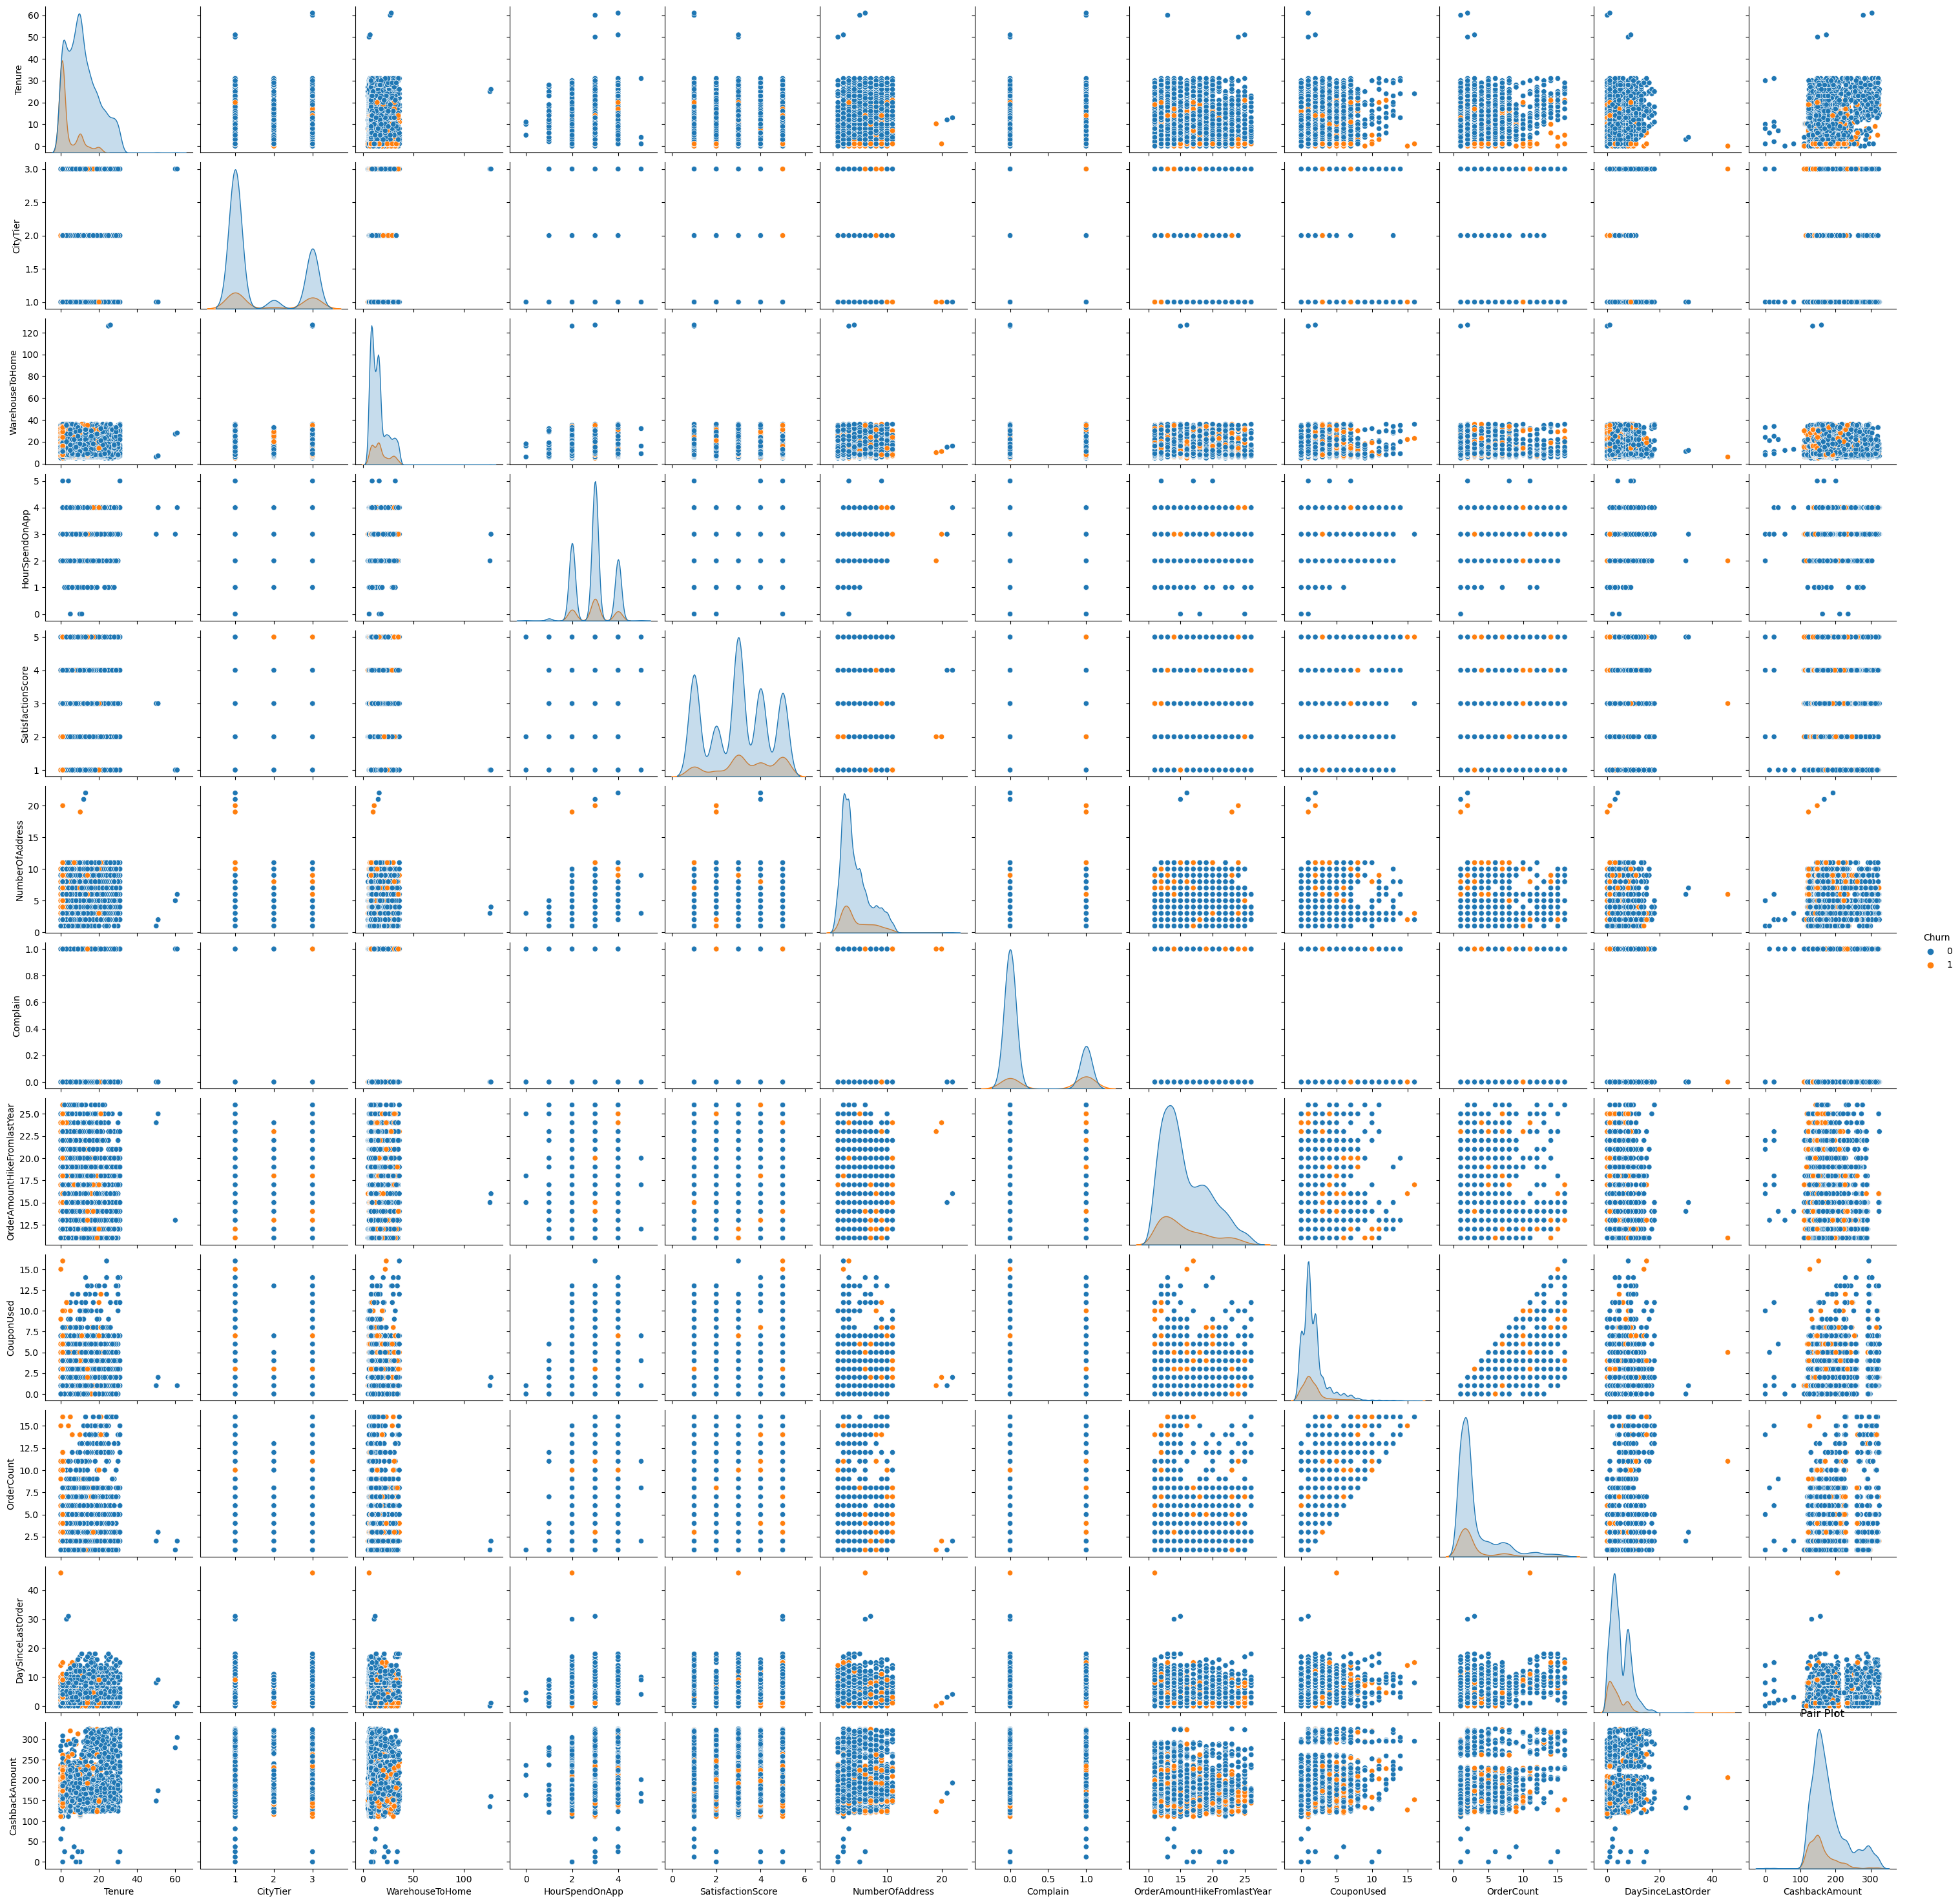

In [46]:
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.title('Pair Plot')
plt.show()

### Question 1: How does the churn rate vary by customer demographic factors such as gender, marital status, and city tier?

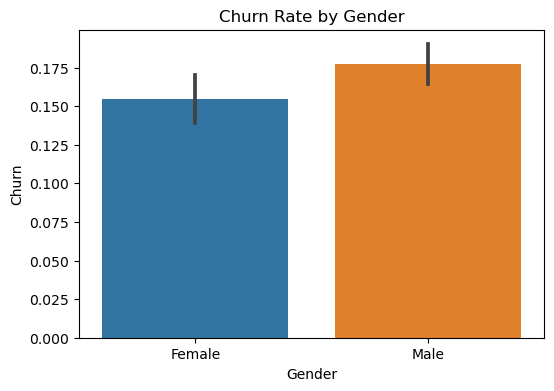

In [52]:
# Churn rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.show()

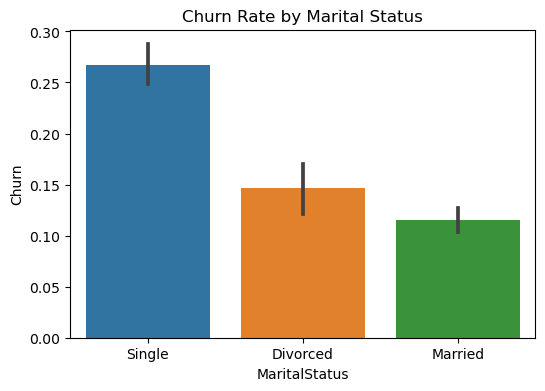

In [53]:
# Churn rate by Marital Status
plt.figure(figsize=(6, 4))
sns.barplot(x='MaritalStatus', y='Churn', data=df)
plt.title('Churn Rate by Marital Status')
plt.show()

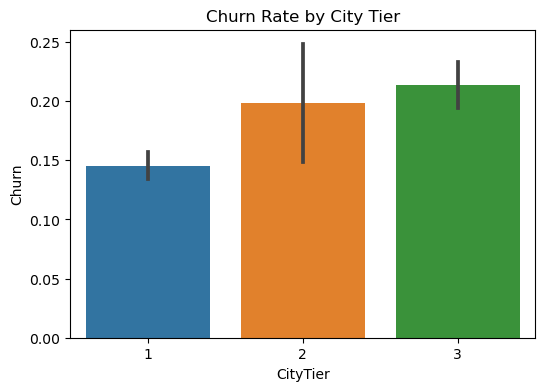

### Question 2: Is there a relationship between customer tenure and churn? Do long-tenured customers have lower churn rates?

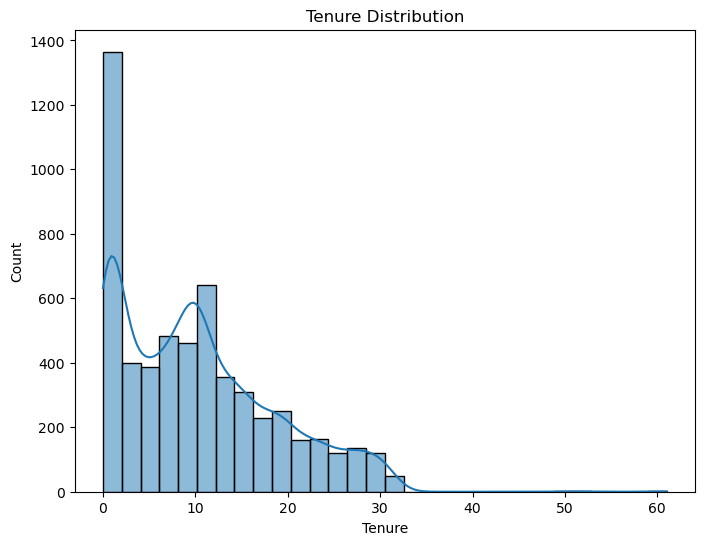

In [66]:
# Plot Tenure distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure', bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

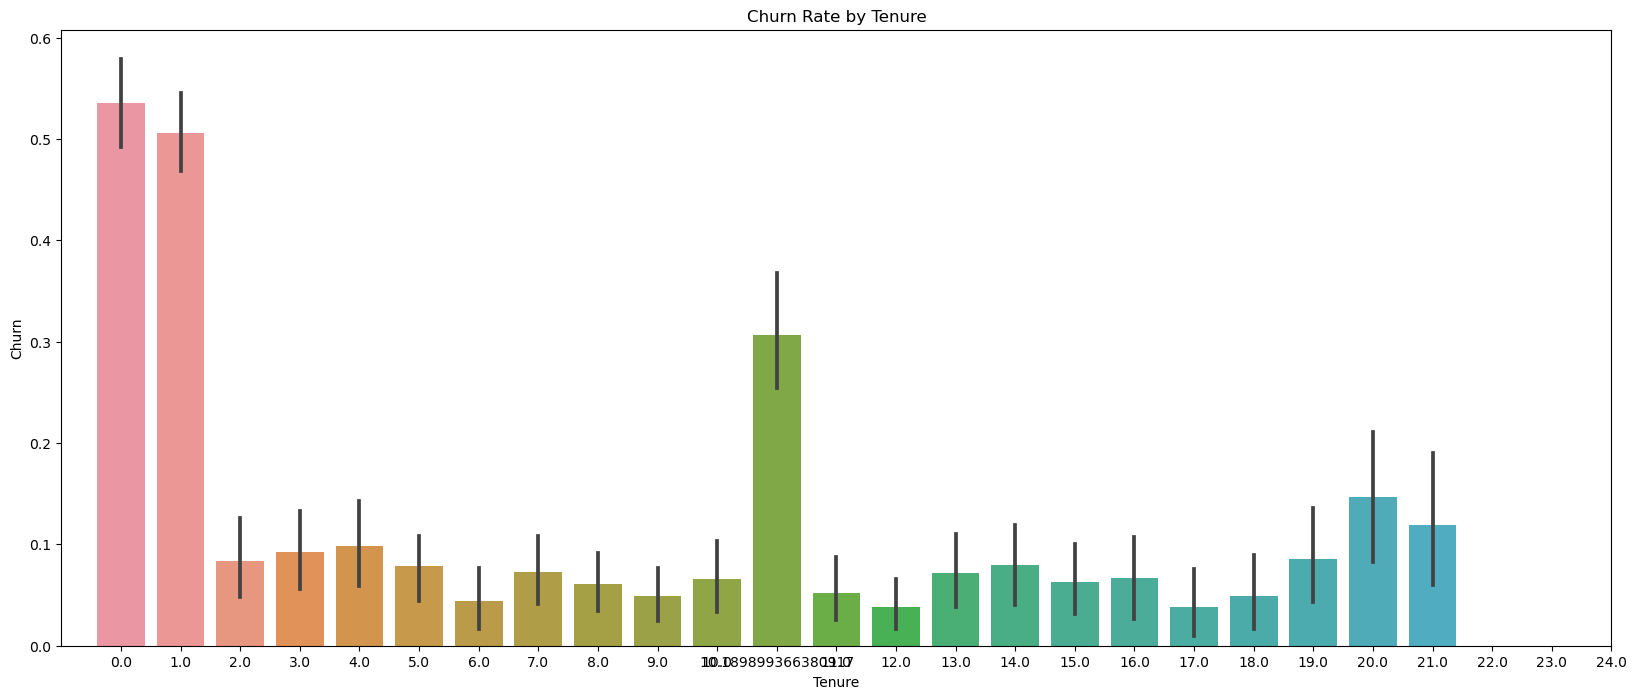

In [62]:
# Churn rate by Tenure
plt.figure(figsize=(20, 8))
sns.barplot(x='Tenure', y='Churn', data=df)
plt.title('Churn Rate by Tenure')
plt.xlim(-1, 25)  
plt.show()

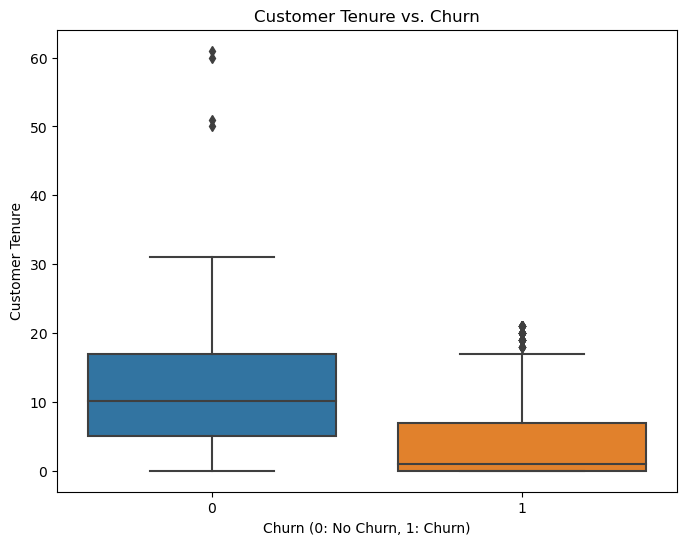

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Customer Tenure')
plt.show()

### Question 3: Which preferred login device has the highest churn rate? Is there a correlation between preferred login devices and customer churn?

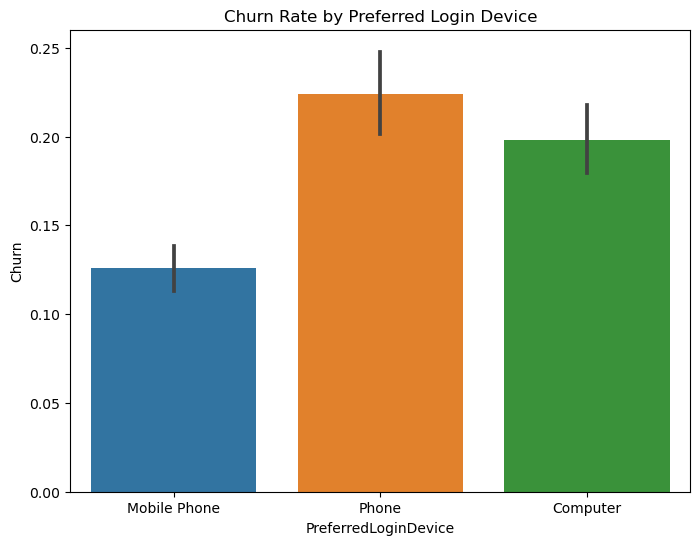

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferredLoginDevice', y='Churn', data=df)
plt.title('Churn Rate by Preferred Login Device')
plt.show()

### Question 4: Does the distance between the warehouse and the customer's home affect the churn rate? Are customers who live farther away more likely to churn?

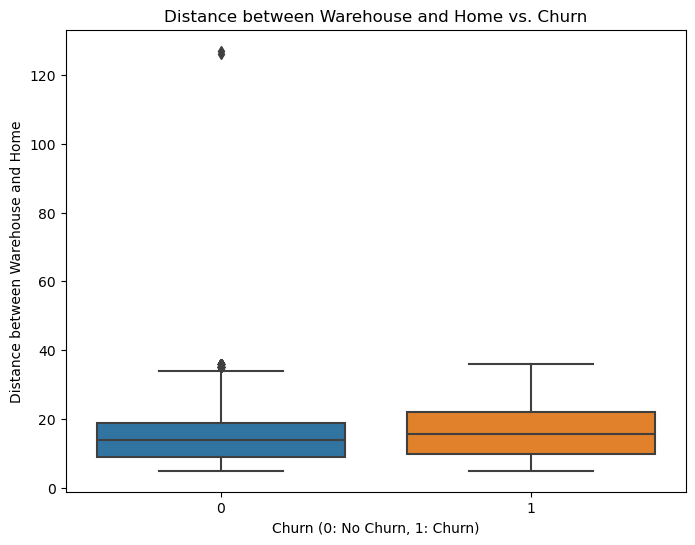

In [69]:
# Distance between Warehouse and Home vs. Churn: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df)
plt.title('Distance between Warehouse and Home vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Distance between Warehouse and Home')
plt.show()

### Question 5: What is the distribution of preferred payment modes among churned customers? Do certain payment methods have a higher churn rate?

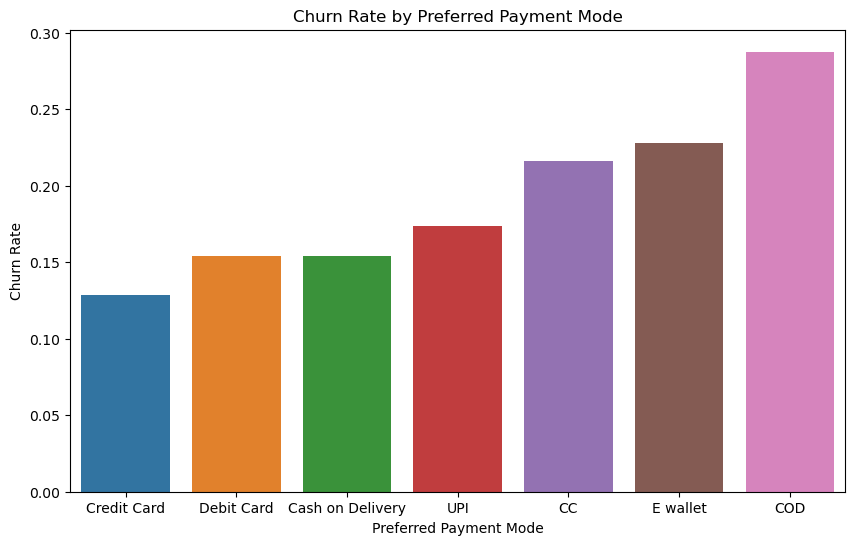

In [73]:
# Calculate churn rates for each preferred payment mode
churn_rate_by_payment_mode = df.groupby('PreferredPaymentMode')['Churn'].mean().reset_index()

# Sort the data in increasing order of churn rate
churn_rate_by_payment_mode = churn_rate_by_payment_mode.sort_values(by='Churn')

# Bar plot: Churn Rate by Preferred Payment Mode (sorted in increasing order)
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredPaymentMode', y='Churn', data=churn_rate_by_payment_mode)
plt.title('Churn Rate by Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.show()

### Question 6: Is there a correlation between the number of hours spent on the mobile application or website and the churn rate? Do customers who spend more time have lower churn rates?

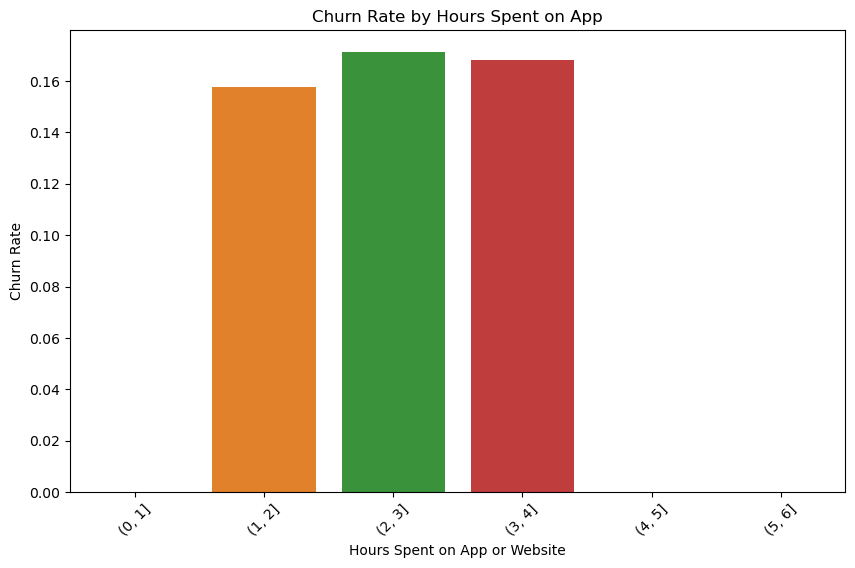

In [77]:
# Hours spent on App vs. Churn: Bar chart
# Group the data into bins based on hours spent on the app
bins = [0, 1, 2, 3, 4, 5, 6]
df['HoursBins'] = pd.cut(df['HourSpendOnApp'], bins=bins)

# Calculate churn rates for each bin
churn_rate_by_hours = df.groupby('HoursBins')['Churn'].mean().reset_index()

# Bar plot: Hours Spent on App vs. Churn
plt.figure(figsize=(10, 6))
sns.barplot(x='HoursBins', y='Churn', data=churn_rate_by_hours)
plt.title('Churn Rate by Hours Spent on App')
plt.xlabel('Hours Spent on App or Website')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Question 6: Does the preferred order category impact the churn rate? Are customers who frequently order from a specific category more likely to churn?

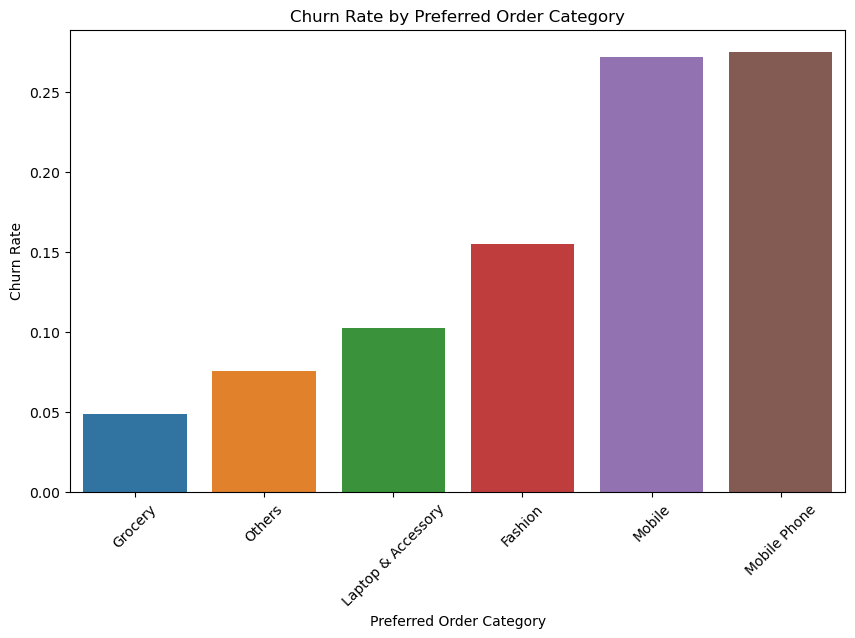

In [79]:
# Preferred Order Category vs. Churn: Bar chart
# Calculate churn rates for each preferred order category
churn_rate_by_order_category = df.groupby('PreferedOrderCat')['Churn'].mean().reset_index()

# Sort the data in increasing order of churn rate
churn_rate_by_order_category = churn_rate_by_order_category.sort_values(by='Churn')

# Bar plot: Churn Rate by Preferred Order Category (sorted in increasing order)
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferedOrderCat', y='Churn', data=churn_rate_by_order_category)
plt.title('Churn Rate by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Question 7: Is there a relationship between customer satisfaction score and churn rate? Do dissatisfied customers have a higher likelihood of churning?

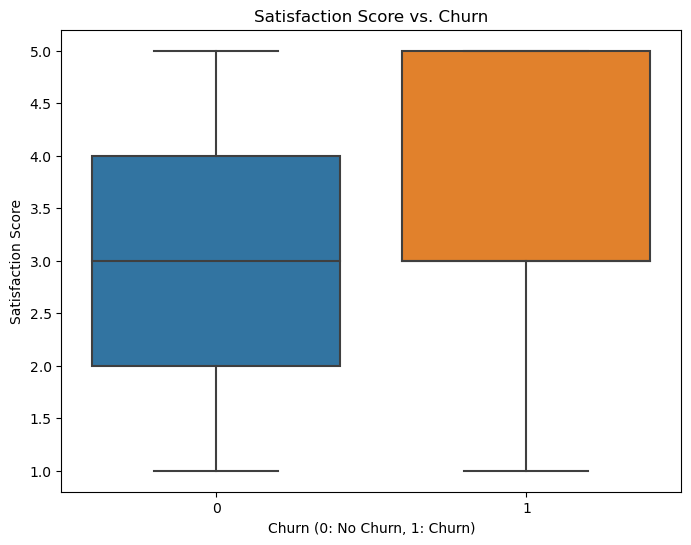

In [80]:
# Satisfaction Score vs. Churn: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('Satisfaction Score vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Satisfaction Score')
plt.show()

### Question 8: Are customers who raised complaints in the last month more likely to churn? Is there a relationship between complaints and churn rate? 

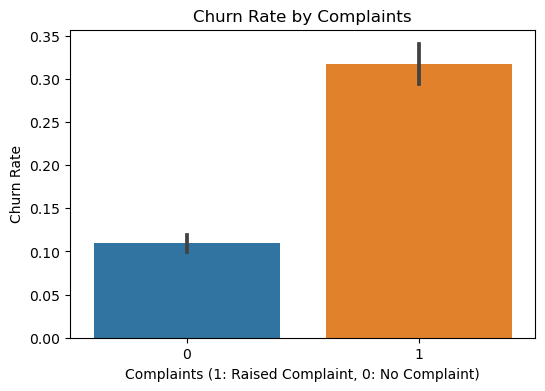

In [81]:
# Complaints vs. Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='Complain', y='Churn', data=df)
plt.title('Churn Rate by Complaints')
plt.xlabel('Complaints (1: Raised Complaint, 0: No Complaint)')
plt.ylabel('Churn Rate')
plt.show()

### Question 9: Is there a correlation between the percentage increase in order amount from last year and churn rate? Do customers who experienced a higher increase in order amount have a lower churn rate?

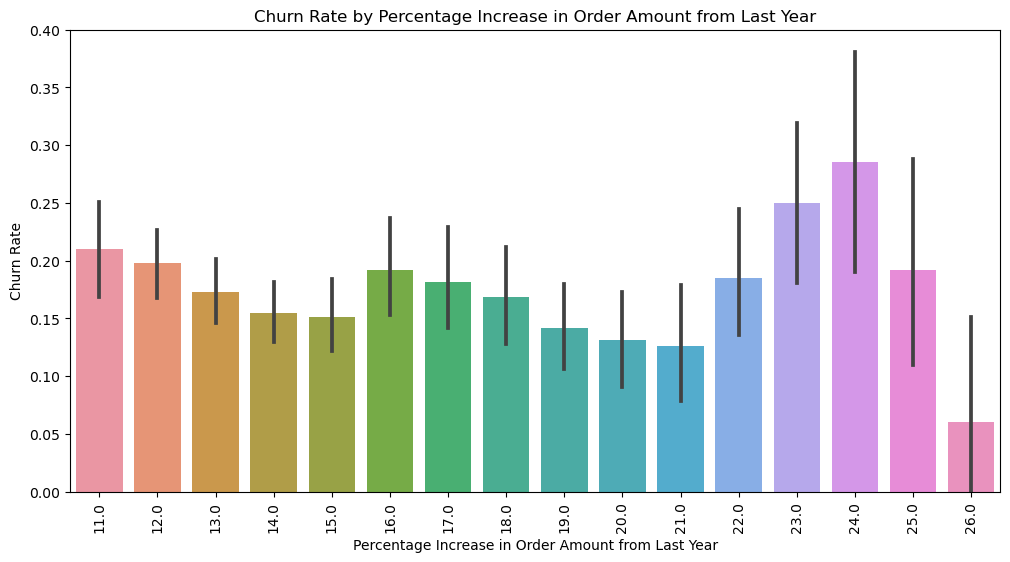

In [84]:
# Order Amount Hike vs. Churn: Scatter plot
plt.figure(figsize=(12, 6))
sns.barplot(x='OrderAmountHikeFromlastYear', y='Churn', data=df)
plt.title('Churn Rate by Percentage Increase in Order Amount from Last Year')
plt.xlabel('Percentage Increase in Order Amount from Last Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()

### Question 10: 